In [1]:
from keras.models import *
from keras.layers import *
from keras.preprocessing.image import *
from keras.applications import *
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot, plot_model

/home/wson/anaconda3/envs/tf/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
def build_model_base(MODEL, input_size: tuple, pre_process_func):
    x_input = Input((input_size[0], input_size[1], 3))
    x = Lambda(pre_process_func)(x_input)
    
    base_model = MODEL(include_top=False)
    x = base_model(x)
    x = GlobalAveragePooling2D()(x)
    model = Model(x_input, x)
    return model

In [2]:
def build_top_model(input_size):
    x_input = Input((input_size,))
    x = Dropout(0.5)(x_input)
    x = Dense(1, activation='sigmoid')(x)
    model = Model(x_input, x)
    return model

In [2]:
def build_model(MODEL, input_size: tuple, pre_process_func):
    x_input = Input((input_size[0], input_size[1], 3))
    x = Lambda(pre_process_func)(x_input)
    
    base_model = MODEL(include_top=False)
    x = base_model(x)
    x = GlobalAveragePooling2D()(x)
    x = Dropout(0.5)(x)
    x = Dense(1, activation='sigmoid')(x)
    model = Model(x_input, x)
    return model

In [2]:
def build_multi_model(input_size):
    x_input_1 = Input((input_size[0],))
    x_input_2 = Input((input_size[1],))
    x_input_3 = Input((input_size[2],))
    x = Concatenate()([x_input_1, x_input_2, x_input_3])
    x = Dropout(0.5)(x)
    x = Dense(1, activation='sigmoid')(x)
    model = Model([x_input_1, x_input_2, x_input_3], x)
    return model

In [5]:
model = build_model(Xception, (299, 299), pre_process_func=xception.preprocess_input)

In [3]:
model = build_top_model(2048)

In [3]:
model = build_multi_model((2048, 2048, 1536))

In [7]:
plot_model(model, show_shapes=True, show_layer_names=True, to_file='xception.png')

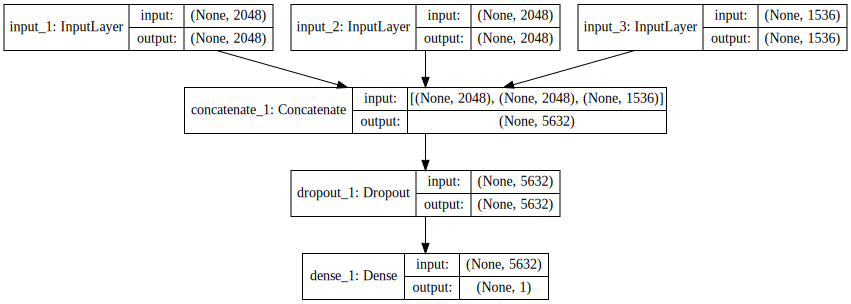

In [4]:
SVG(model_to_dot(model, show_shapes=True).create(prog='dot', format='svg'))